# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [97]:
pd.set_option('display.max_columns', None) 
df = pd.read_csv("telecom_users.csv", index_col=0)  # загружаем данные
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


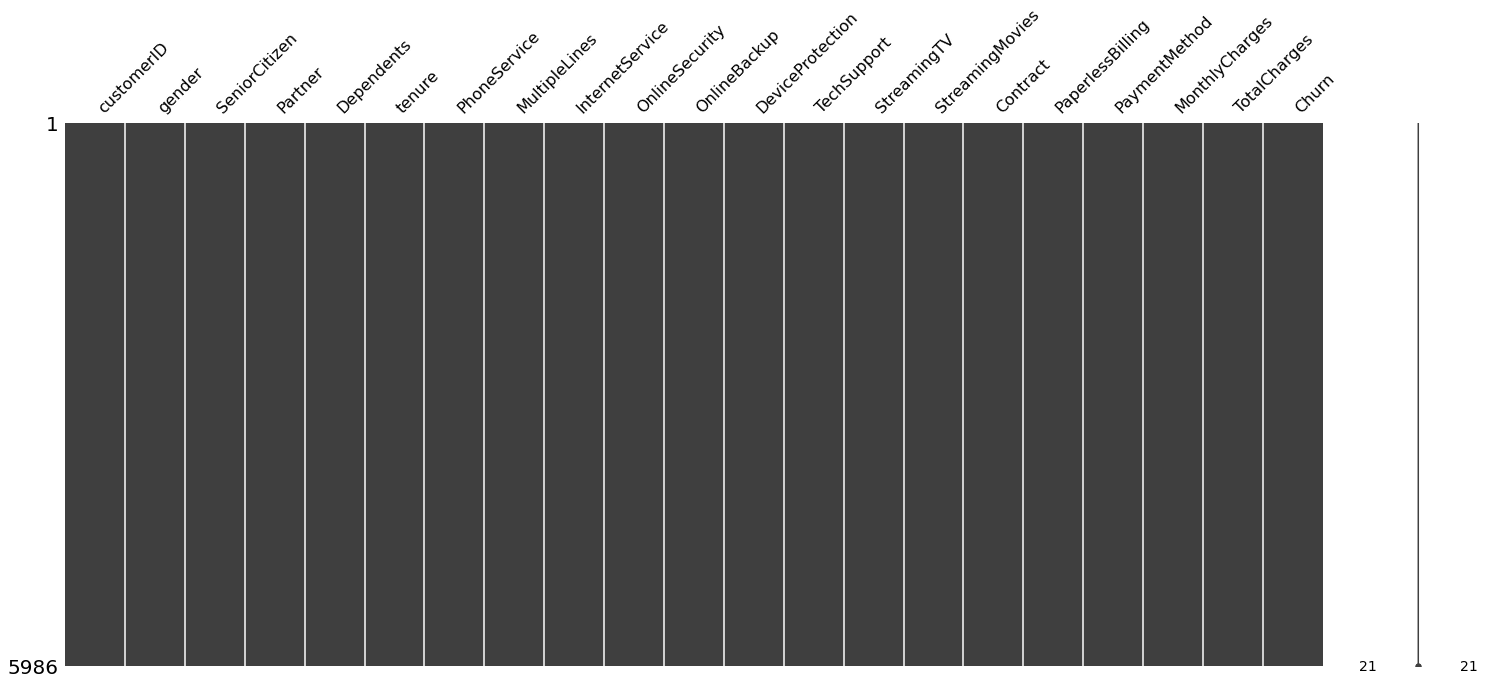

In [98]:
msno.matrix(df)  # проверяем, есть ли пустые значения

Прекрасно! Датафрейм уже почищен.

In [99]:
def info(column):     # здесь пишу общую функцию, с помощью которой можно будет описать любой столбец
    if column.dtype == 'int64' or column.dtype == 'float64':
        print(f'Минимальное значение в колонке: {column.agg("min")}')
        print(f'Максимальное значение в колонке: {column.agg("max")}')
        print(f'Медианное значение в колонке: {column.agg("median")}')
        print(f'Среднее значение в колонке: {column.agg("mean")}')     # применение базовых аггрегирующих функций
        
        stat = column.value_counts()
        plt.figure(figsize=(8, 6))
        plt.title(f"Данные по колонке {pd.DataFrame(stat).reset_index().iloc[:, 1].name}", fontsize=16)
        y = pd.DataFrame(stat).reset_index().iloc[:, 1]
        sns.histplot(column)                     # строим гистограмму, смотрим распределение
        plt.xlabel(column.name, fontsize=13)
        plt.ylabel("Распределение клиентов", fontsize=13)
        plt.show()
    
    elif column.dtype == 'O':    # для типа объект счёт разумным просто посчитать число пользователей в каждой из категорий и
        stat = column.value_counts()    # вывести барплот
        plt.figure(figsize=(6, 6))
        plt.title(f"Данные по колонке {pd.DataFrame(stat).reset_index().iloc[:, 1].name}", fontsize=16)
        x = pd.DataFrame(stat).index
        y = pd.DataFrame(stat).reset_index().iloc[:, 1]
        sns.barplot(x=x, y=y)
        plt.xlabel(xlabel=pd.DataFrame(stat).reset_index().iloc[:, 1].name, fontsize=13)
        plt.ylabel(ylabel="Количество клиентов", fontsize=13)
        plt.xticks(rotation=45)
        plt.show()
        print(stat)
    
    

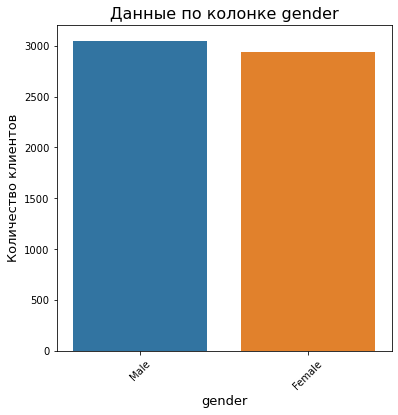

Male      3050
Female    2936
Name: gender, dtype: int64


In [100]:
info(df.gender)     # мужчин немного больше, чем женщин

Минимальное значение в колонке: 0
Максимальное значение в колонке: 1
Медианное значение в колонке: 0.0
Среднее значение в колонке: 0.16137654527230202


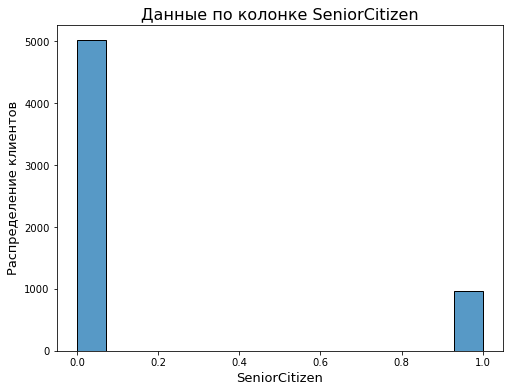

In [101]:
info(df.SeniorCitizen)    

Здесь получилось не совсем удачно, потому что вместо YES/NO значения 1/0. Можно бы было сделать замену, однако основные данные можно получить и по этой гистограмме. Итого, 1/6 клиентов - пенсионеры.

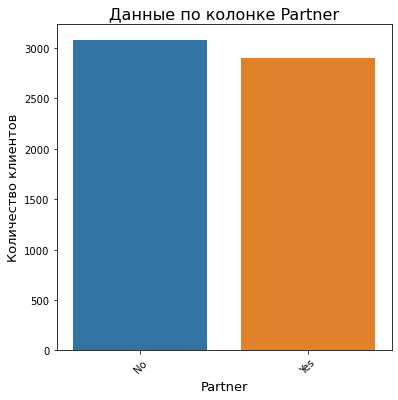

No     3082
Yes    2904
Name: Partner, dtype: int64


In [102]:
info(df.Partner)

Чуть менее половины клиентов - женаты.

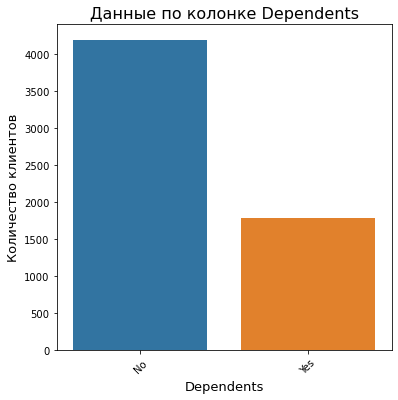

No     4195
Yes    1791
Name: Dependents, dtype: int64


In [103]:
info(df.Dependents)

Менее чем у трети клиентов есть люди, находящиеся на их попечении

Минимальное значение в колонке: 0
Максимальное значение в колонке: 72
Медианное значение в колонке: 29.0
Среднее значение в колонке: 32.46876044102907


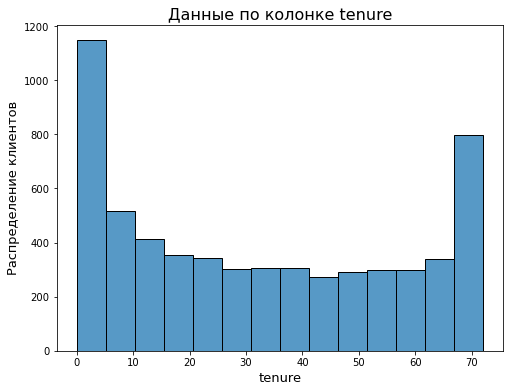

In [104]:
info(df.tenure)

Распределение является бимодальным! В среднем, клиенты пользуются услугами фирмы 2.5 года, однако больше всего очень новых (0-5 мес) и очень старых клиентов (около 6 лет).

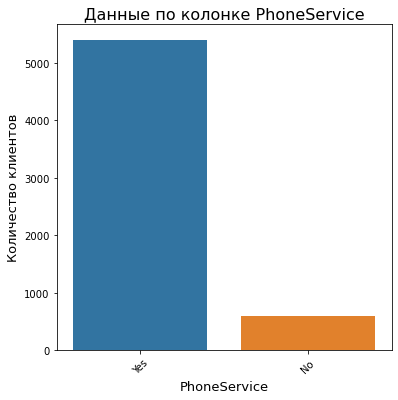

Yes    5396
No      590
Name: PhoneService, dtype: int64


In [105]:
info(df.PhoneService)

Почти 90% клиентов пользуются услугой телефонии. Придадим другой вид этому графику.

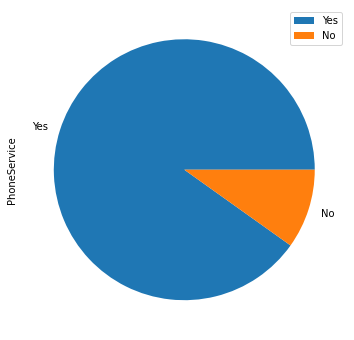

In [106]:
pd.DataFrame(df.PhoneService.value_counts()).plot.pie(y='PhoneService', figsize=(6, 6))
plt.show()

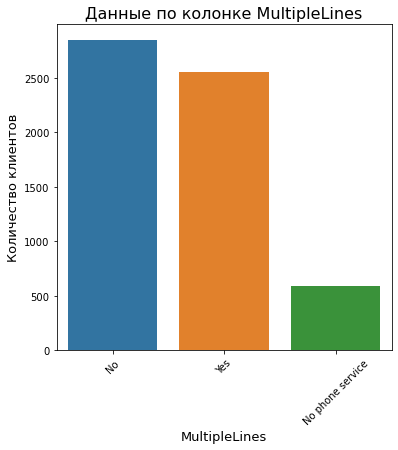

No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64


In [107]:
info(df.MultipleLines)

Из всех клиентов, которые пользовались услугой телефона, примерно половина пользовалась несколькими линиями связи.

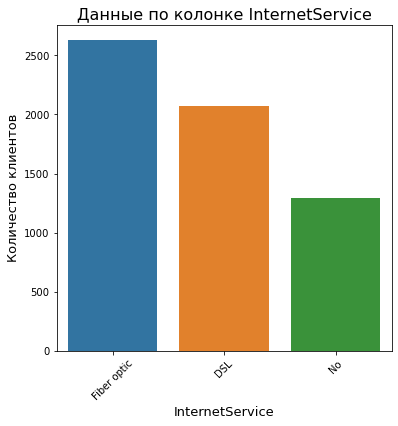

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64


In [108]:
info(df.InternetService)

Приблизительно 1/5 клиентов не пользуются интернетом, 1/3 пользуется DSL и чуть менее половины пользуются оптоволоконной технологией

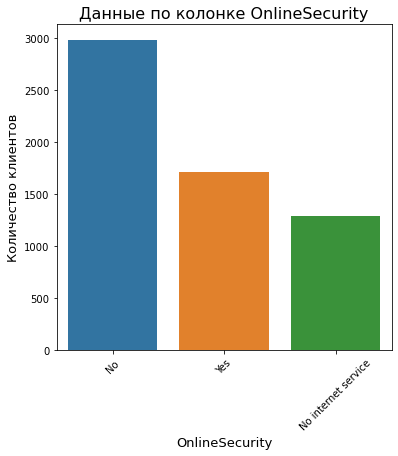

No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64


In [109]:
info(df.OnlineSecurity)

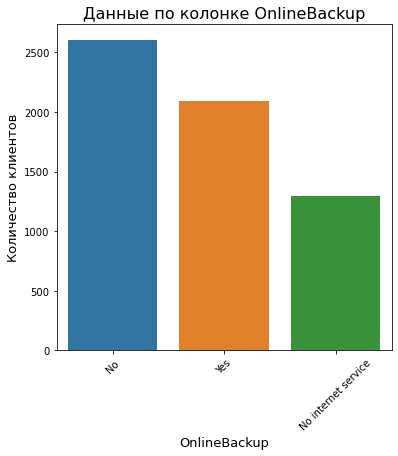

No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64


In [110]:
info(df.OnlineBackup)

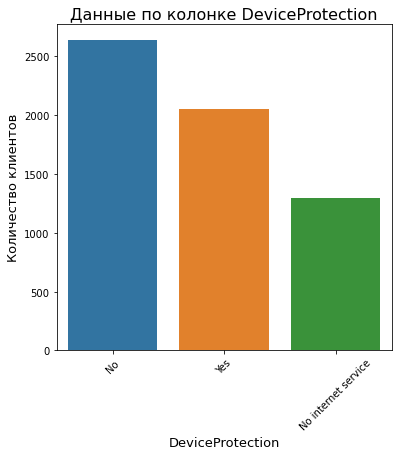

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64


In [111]:
info(df.DeviceProtection)

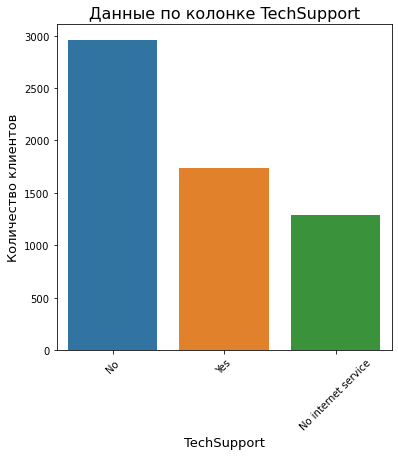

No                     2960
Yes                    1735
No internet service    1291
Name: TechSupport, dtype: int64


In [112]:
info(df.TechSupport)

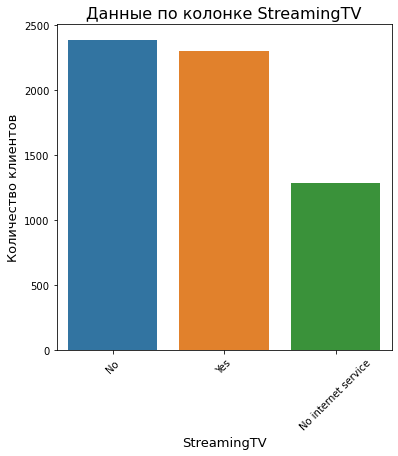

No                     2389
Yes                    2306
No internet service    1291
Name: StreamingTV, dtype: int64


In [113]:
info(df.StreamingTV)

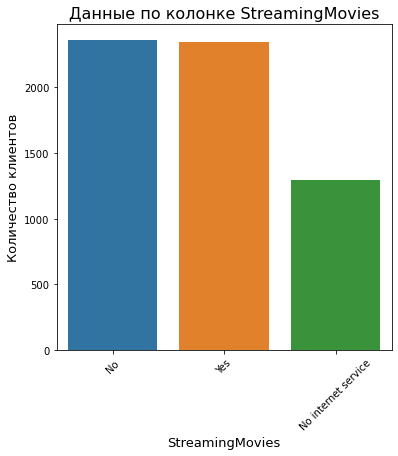

No                     2356
Yes                    2339
No internet service    1291
Name: StreamingMovies, dtype: int64


In [114]:
info(df.StreamingMovies)

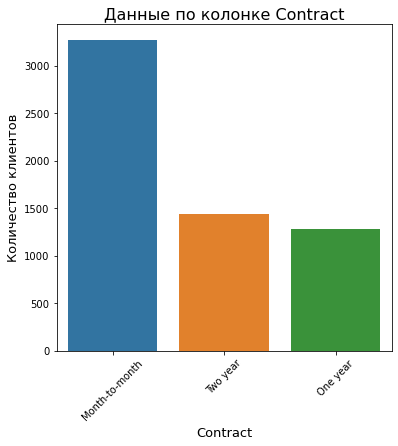

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64


In [115]:
info(df.Contract)

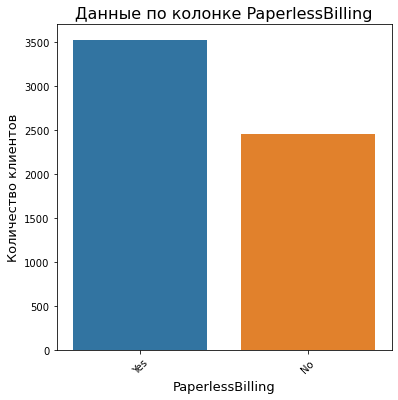

Yes    3528
No     2458
Name: PaperlessBilling, dtype: int64


In [116]:
info(df.PaperlessBilling)

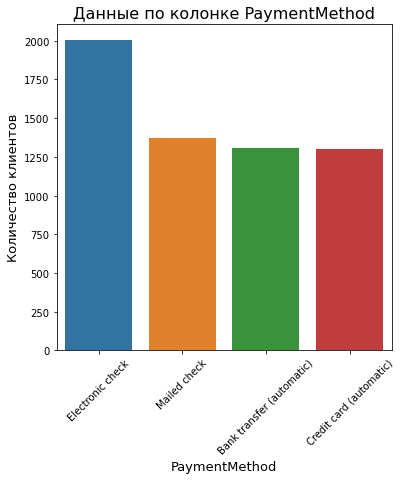

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64


In [117]:
info(df.PaymentMethod)

Что ж, способы оплаты почти онлайн. Самый популярный - электронный чек (видимо, это то, что присылают на мейл мне, когда я плачу за интернет).

Минимальное значение в колонке: 18.25
Максимальное значение в колонке: 118.75
Медианное значение в колонке: 70.4
Среднее значение в колонке: 64.8022134981624


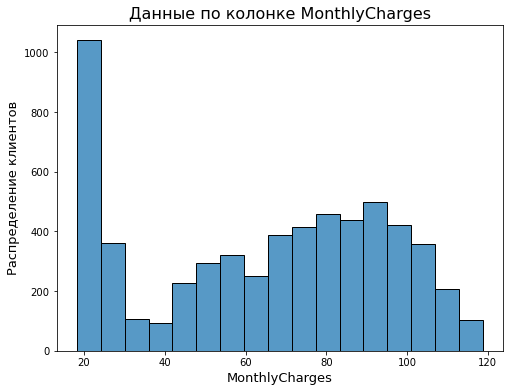

In [118]:
info(df.MonthlyCharges)

In [119]:
dat = pd.DataFrame(df.TotalCharges)
data = pd.DataFrame(pd.to_numeric(dat.TotalCharges, errors='coerce'))
pd.isnull(data).sum() 

TotalCharges    10
dtype: int64

С этим столбцом выплат возник ряд проблем. Несмотря на то, что он состоял из чисел, тип данных был "объект". Некоторые значения упорно не хотели конвертироваться методом astype, вызывая ошибки. Выше было найдено, что 10 строк содержат недопустимые значения. Теперь посмотрим эти строки

In [120]:
data[data.isna().any(axis=1)] 

,TotalCharges
6754,NaN
1340,NaN
3826,NaN
5218,NaN
3331,NaN
936,NaN
753,NaN
4380,NaN
488,NaN
1082,NaN


In [121]:
dat = dat.reset_index()

In [122]:
dat[dat['index'] == 6754]

,index,TotalCharges
356,6754,


Здесь видим, что значение строки - пустое. Заполним образовавшиеся NaNы медианными значениями по столбцу.

In [123]:
data = data.fillna(data.agg('median'))

In [124]:
data.isnull().sum()   # здесь видно, что NaNов не осталось

TotalCharges    0
dtype: int64

In [125]:
df['TotalCharges'] = data.TotalCharges    # делаем замену старого столбца на новый исправленный

Минимальное значение в колонке: 18.8
Максимальное значение в колонке: 8684.8
Медианное значение в колонке: 1412.15
Среднее значение в колонке: 2296.5806465085207


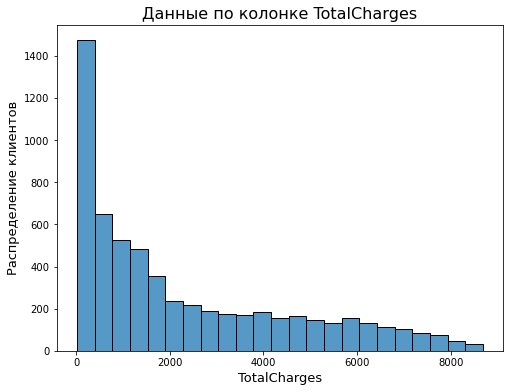

In [126]:
info(df['TotalCharges'])

Большинство клиентов платили незначительные суммы денег, скорее всего, это подключенные недавно клиенты.

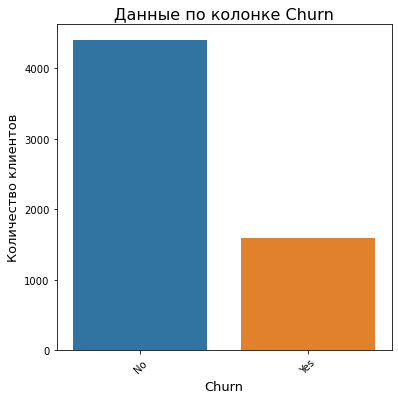

No     4399
Yes    1587
Name: Churn, dtype: int64


In [127]:
info(df.Churn)

Здесь неутешительные данные, более четверти клиентов ушли на лёгком катере

# 2. Исследование зависимостей и формулирование гипотез

In [128]:
df = df.drop('customerID', axis=1)

In [129]:
for i in range(20):
    if df.iloc[:, i].dtype == 'O':
        df.iloc[:, i] = df.iloc[:, i].astype('category')
    else:
        pass

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
4528,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
6344,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
6739,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
432,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0


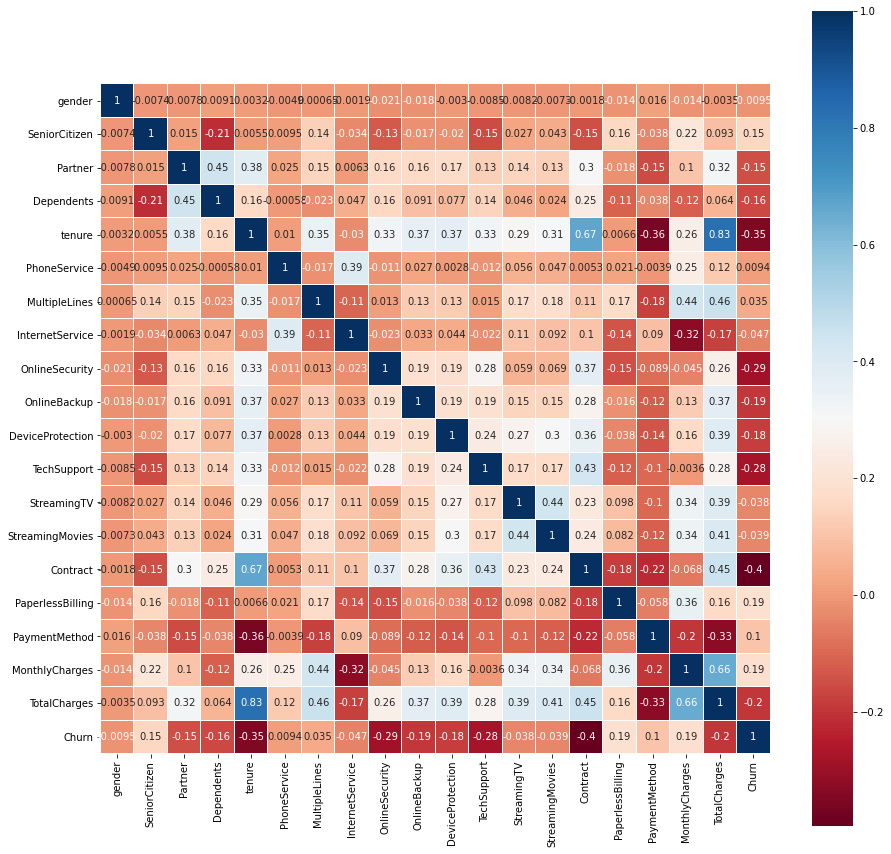

In [130]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Столбец tenure имеет хорошую положительную корреляцию с количеством денег, которые внёс клиент в сумме (что крайне логично).
Следовательно, второй столбец можно откинуть. <br><br>
Также из матрицы видно, что большинство людей, подключивших себе интернет, также подключили и дополнительные услуги (синяя область в центре матрицы). Столбцы с дополнительными услугами тоже можно откинуть <br><br>
Ключевой столбец churn имеет заметную отрицательную корреляцию с длиной контракта и с временем пользования услугами. Получается, что уходят в основном новые клиенты, а также клиенты, помесячно оплачивающие услуги связи (что тоже логично). <br><br>
Целевая переменная имеет заметную положительную корреляцию со столбцом internet service, который имеет крайне выраженную корреляцию с ежемесячной оплатой. Из этого можно предположить, что люди уходят из-за чрезмерно дорогого интернета! <br><br>

Здесь я абсолютно зря удалил фичи, из-за чего модели давали очень низкий результат. Было принято решение работать с полным датафреймом.

In [131]:
y = df.Churn
X = df.drop('Churn', axis=1).copy()

# 3. Построение моделей для прогнозирования оттока

In [167]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import numpy as np


import warnings
warnings.filterwarnings("ignore")


In [133]:
skf = StratifiedKFold(n_splits=5, random_state=34)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

### Модели:

In [135]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=34)
svc = SVC(random_state=34, max_iter=1200, probability=True)
rfc = RandomForestClassifier(random_state=34)
lr = LogisticRegression(random_state=34, max_iter=1200)
gbc = GradientBoostingClassifier(random_state=34)    # Некоторые стандартные модели

### Словари параметров:

In [136]:
knn_params = {"n_neighbors": range(3, 11),
             "weights": ['uniform', 'distance'],
             'leaf_size': range(20, 40, 2),
             'p': [1, 2]}

In [137]:
dtc_params = {'criterion': ['gini', 'entropy'],
             'max_depth': range(2, 20, 1),
             'ccp_alpha': np.arange(0.0, 1.0, 0.1)}

In [138]:
svc_params = {"C": np.arange(0.1, 1.1, 0.1),
             "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': range(2, 5),
             'coef0': np.arange(0.1, 0.8, 0.2)}

In [139]:
rfc_params = {'n_estimators': range(50, 120, 10),
             'criterion': ['gini', 'entropy'],
             'max_depth': range(3, 12),
             'ccp_alpha': np.arange(0.0, 1.0, 0.1)}

In [140]:
lr_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            "C": np.arange(0.1, 1.1, 0.1),
            'tol': [10**(-3), 10**(-4), 10**(-5), 10**(-6)],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "l1_ratio": np.arange(0.1, 1.0, 0.2)}

In [141]:
gbc_params = {'n_estimators': range(50, 120, 10),
             "learning_rate": np.arange(0.05, 0.45, 0.05),
             'max_depth': range(3, 12),
             'tol': [10**(-3), 10**(-4), 10**(-5), 10**(-6)]}

### GridSearch:

In [142]:
# knn_grid = GridSearchCV(knn, knn_params, cv=skf)
# knn_grid.fit(X_train, y_train)
# knn_grid.best_params_

In [143]:
knn_best = {'leaf_size': 28, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

In [144]:
# dtc_grid = GridSearchCV(dtc, dtc_params, cv=skf)
# dtc_grid.fit(X_train, y_train)
# dtc_grid.best_params_

In [145]:
dtc_best = {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3}

In [146]:
# svc_grid = GridSearchCV(svc, svc_params, cv=skf)
# svc_grid.fit(X_train, y_train)
# svc_grid.best_params_

In [147]:
svc_best = {'C': 0.1, 'coef0': 0.1, 'degree': 2, 'kernel': 'poly'}

In [148]:
# rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf)
# rfc_grid.fit(X_train, y_train)
# rfc_grid.best_params_

In [149]:
rfc_best = {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 7, 'n_estimators': 110}

In [150]:
# lr_grid = GridSearchCV(lr, lr_params, cv=skf, verbose=1, n_jobs=-1)
# lr_grid.fit(X_train, y_train)
# lr_grid.best_params_

In [151]:
lr_best = {'C': 0.4, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}

In [152]:
# gbc_grid = GridSearchCV(gbc, gbc_params, cv=skf, verbose=1, n_jobs=-1)
# gbc_grid.fit(X_train, y_train)
# gbc_grid.best_params_

In [153]:
gbc_best = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 90, 'tol': 0.001}

### Обучение и ROC_AUC_score моделей

Здесь последовательно заносим найденные параметры в модели и вычисляем ROC_AUC с predict_proba

In [154]:
knn.set_params(**knn_best)
knn.fit(X_train, y_train)
y_pred = knn.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:, 1])   # KNN

0.7731640965173899

In [155]:
dtc.set_params(**dtc_best)
dtc.fit(X_train, y_train)
y_pred = dtc.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:, 1])   # DTC

0.8004847447961221

In [156]:
svc.set_params(**svc_best)
svc.fit(X_train, y_train)
y_pred = svc.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:, 1])   # SVC

0.5834138672462026

In [157]:
rfc.set_params(**rfc_best)
rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:, 1])  # RFC

0.8381615148082214

In [158]:
lr.set_params(**lr_best)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:, 1])   # LR

0.8386840219175548

In [159]:
gbc.set_params(**gbc_best)
gbc.fit(X_train, y_train)
y_pred = gbc.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:, 1])   # GBC

0.843386585901556

# 4. Сравнение качества моделей 

In [160]:
quality_array = np.zeros((6, 6))
dfq = pd.DataFrame(quality_array)

d = {0: 'Модель',
    1: 'Accuracy',
    2: 'Precision',
    3: 'Recall',
    4: 'ROC_AUC',
    5: 'ROC_AUC_proba'}
dfq.rename(mapper=d, axis=1, inplace=True)   # Создаём пустой датафрейм и переименовываем колонки
dfq

,Модель,Accuracy,Precision,Recall,ROC_AUC,ROC_AUC_proba
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
dfq['Модель'] = dfq['Модель'].astype(str)
dfq['Модель'] = ['k Nearby Neighbors', 'Decision Tree', 'Support Vector Classifier', 'Random Forest Classifier',
                 'Logistic Regression', 'Gradient Boosting']

In [164]:
models = [knn, dtc, svc, rfc, lr, gbc]
dfq['Accuracy'] = [accuracy_score(y_test, model.predict(X_test)) for model in models]
dfq['Precision'] = [precision_score(y_test, model.predict(X_test)) for model in models]
dfq['Recall'] = [recall_score(y_test, model.predict(X_test)) for model in models]
dfq['ROC_AUC'] = [roc_auc_score(y_test, model.predict(X_test)) for model in models]
dfq['ROC_AUC_proba'] = [roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) for model in models]

In [165]:
dfq

,Модель,Accuracy,Precision,Recall,ROC_AUC,ROC_AUC_proba
0,k Nearby Neighbors,0.775056,0.671378,0.379242,0.653713,0.773164
1,Decision Tree,0.765033,0.617910,0.413174,0.657166,0.800485
2,Support Vector Classifier,0.721047,0.000000,0.000000,0.500000,0.583414
3,Random Forest Classifier,0.787862,0.684049,0.445110,0.682787,0.838162
4,Logistic Regression,0.802339,0.674641,0.562874,0.728927,0.838684
5,Gradient Boosting,0.797327,0.699708,0.479042,0.699753,0.843387


Модель kNN имеет неплохую accuracy и почти набрала барьер по ROC_AUC, однако recall такой модели очень низкий, что свидетельствует о том, что многие клиенты, которые должны уйти, моделью предсказаны как "оставшиеся".

Модель DTC в среднем немного лучше, чем kNN и набирает необходимый порог.

Помнится, в лекциях рассказывали про некую "тупую модель", которая будет относить все объекты к одному классу и всё равно будет чаще всего права. SVC - именно этот случай. Параметры для него искались более 2 часов, однако, её смело можно выкидывать в помойку. Специально показываю матрицу ошибок для этой модели.

In [168]:
confusion_matrix(y_test, svc.predict(X_test))

array([[1295,    0],
       [ 501,    0]], dtype=int64)

Модель RFC в целом сработала неплохо, хорошие показатели ROC_AUC, accuracy и ROC_AUC_proba. Однако recall достаточно низкий, что делает её чрезмерно "оптимистичной".

Модель логистической регрессии по праву занимает второе место, обладает не только хорошим ROC_AUC_proba, но и лучшими accuracy и ROC_AUC. Параметры для неё подбирались дольше всего, однако, как видно, не зря. Recall этой модели также заметно лучше остальных.

Модель GBC является победителем по показателю ROC_AUC_proba, однако по остальным метрикам она уступает LR.